## Методические указания к Лабораторной работе № 2  
## «Технология построения аналитических отчетов с использованием SAS Enterprise Guide»  
##  

### __Цель работы__
Овладеть навыками навыками построения отчетов различного формата при помощи SAS
Enterprise Guide.


#### __Общий порядок выполнения работы:__
1. Создать проект
2. Добавить данные в проект (SAS набор, xls, txt) согласно варианту
3. Создать форматы: наименования догор, наименования показателей, наименования видов
отчетности
4. Применить формат для детальной таблицы (base)
5. Создать отчет, который выводит итоговое значение показателя (показатели по вариантам,
используя отчетность H, т.е. нарастающий итог) по годам для каждой дороги на отдельной
странице
6. Отменить использование форматы для детальной таблицы, в дальнейшем назначать
формат при формировании отчета
7. Создать отчет (Summary Statistics), который выводит статистику показателя (показатели по
вариантам, используя отчетность H, т.е. нарастающий итог) по годам по дорогам
8. Создать сводный отчет (Summary Table), который выводит итоговое значения показателя
(используя отчетность H, т.е. нарастающий итог) по дорогам по годам для каждого
показателя на отдельной странице (показатели по вариантам)
9. Создать графический отчет (Bar Chart), который будет выводить значение показателя
(показатели по вариантам, используя отчетность P, т.е. ненарастающий итог) за 2003 год
по дорогам

#### __Задание__
Средствами SAS Enterprise Guide подключить данные к проекту, создать форматы для
переменных детальной таблицы base, построить отчеты табличного и графического вида и
экспортировать результаты.
#### __Требования к отчету о выполнении лабораторной работы__
#### Отчет должен содержать:
1. Титульный лист
2. Текст задания
3. Описание исходных файлов
4. Полученные отчеты (по одной таблице (графику) для каждого пункта)

In [1]:
libname lab2 'var3';
proc copy noclone in=lab2 out=work;
    select dor;
run;

proc datasets library=work;
    modify dor/ correctencoding='Windows-1251';
run;

data base;
    set lab2.dor (encoding='Windows-1251');
run; 

SAS Connection established. Subprocess id is 4734



In [2]:
proc print data=work.dor(obs=10);
run;

Obs,DOR_ID,NAME
1,001,Октябрьская
2,002,Калининградская
3,003,Московская
4,004,Горьковская
5,005,Северная
6,006,Северо-Кавказская
7,007,Юго-Восточная
8,008,Приволжская
9,009,Куйбышевская
10,010,Свердловская


In [3]:
proc copy noclone in=lab2 out=work;
    select base;
run;

data base;
    set lab2.base;
run; 

In [4]:
proc print data=work.base(obs=10);
run;

Obs,DATE,DOR_ID,VAR_ID,OPERIOD,fact,plan
1,01MAR1997,001,10,H,610980,0
2,01MAR1997,001,10,Q,610980,0
3,01JUN1997,001,10,H,547107,0
4,01JUN1997,001,10,Q,1158087,0
5,01SEP1997,001,10,H,602989,0
6,01SEP1997,001,10,Q,1761076,0
7,01DEC1997,001,10,H,-264352,0
8,01DEC1997,001,10,Q,1496724,0
9,01MAR1998,001,10,H,376046,0
10,01MAR1998,001,10,Q,376046,0


In [10]:
proc copy noclone in=lab2 out=work;
    select var;
run;

proc datasets library=work;
    modify var/ correctencoding='Windows-1251';
run;

data var;
    set lab2.var (encoding='Windows-1251');
run; 

In [11]:
proc print data=work.var(obs=10);
run;

Obs,VAR_ID,NAME,MES_ID,EZ_ID,RAIL_ID,DV_ID,TYA_ID,HOZ_ID,STAT,MONEY
1,10,Прочие операционные расходы,73,100,,10,1,01,,Y
2,100,Затраты на обслуживанию пассажирских вагонов в поездах,73,110,,10,1,03,CUM,Y
3,100000,Среднемесячная заработная плата,1001,.,,.,.,.,,
4,100001,Ремонтоемкость локомотивного парка,47,.,,.,.,.,,
5,100002,Ремонтоемкость вагонного парка,46,.,,.,.,.,,
6,100003,Удельные амортизационные отчисления,29,.,,.,.,.,,
7,100004,Инвентарный парк локомотивов без парка в запасе мпс,32,.,,.,.,.,,
8,100005,Контингент на перевозках,1004,.,,.,.,.,,
9,100006,Производительность труда по объему работ,72,.,,.,.,.,,
10,100007,Приведенный грузооборот,1005,.,,.,.,.,,


In [12]:
filename file "var3/operiod.csv" encoding="wcyrillic";
proc import datafile=file
        out=operiod
        dbms=dlm 
        replace;
     delimiter=',';
     getnames=yes;
run;

proc print data=work.operiod;
run;

Obs,NAME,OPERIOD
1,Оперативная отчетность,M
2,Квартальная отчетность,Q
3,Квартальная отчетность ненарастающим итогом,H
4,Месячная отчетность ненарастающим итогом,P


## __Создание форматов__

#### __формат для dor__

In [13]:
data formatDor(keep=fmtname start label);
    set work.dor;
    retain fmtname '$fdors';
    rename name=label dor_id=start;
run;

In [14]:
proc format cntlin=work.formatDor;
run;

proc print data=work.formatDor(obs=10);
run;

Obs,start,label,fmtname
1,001,Октябрьская,$fdors
2,002,Калининградская,$fdors
3,003,Московская,$fdors
4,004,Горьковская,$fdors
5,005,Северная,$fdors
6,006,Северо-Кавказская,$fdors
7,007,Юго-Восточная,$fdors
8,008,Приволжская,$fdors
9,009,Куйбышевская,$fdors
10,010,Свердловская,$fdors


#### __формат для operiod__

In [15]:
data formatOperiod(keep=fmtname start label);
    set work.operiod;
    retain fmtname '$foper';
    rename name=label operiod=start; 
run;

In [16]:
proc format cntlin=work.formatOperiod;
run;

proc print data=formatOperiod;
run;

Obs,label,start,fmtname
1,Оперативная отчетность,M,$foper
2,Квартальная отчетность,Q,$foper
3,Квартальная отчетность ненарастающим итогом,H,$foper
4,Месячная отчетность ненарастающим итогом,P,$foper


#### __формат для var__

In [23]:
data formatVar(keep=fmtname start label);
    set work.var;
    retain fmtname '$fvarID';
    rename name=label var_id=start; 
run;

In [24]:
proc format cntlin=work.formatVar;
run;

proc print data=formatVar(obs=10);
run;

Obs,start,label,fmtname
1,10,Прочие операционные расходы,$fvarID
2,100,Затраты на обслуживанию пассажирских вагонов в поездах,$fvarID
3,100000,Среднемесячная заработная плата,$fvarID
4,100001,Ремонтоемкость локомотивного парка,$fvarID
5,100002,Ремонтоемкость вагонного парка,$fvarID
6,100003,Удельные амортизационные отчисления,$fvarID
7,100004,Инвентарный парк локомотивов без парка в запасе мпс,$fvarID
8,100005,Контингент на перевозках,$fvarID
9,100006,Производительность труда по объему работ,$fvarID
10,100007,Приведенный грузооборот,$fvarID


### __Применение форматов__

In [25]:
data base;
    set base;
    format dor_id $fdors. operiod $foper. var_id $fvarID.;
run;

In [26]:
proc print data=base(obs=10);
run;

Obs,DATE,DOR_ID,VAR_ID,OPERIOD,fact,plan
1,01MAR1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность ненарастающим итогом,610980,0
2,01MAR1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность,610980,0
3,01JUN1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность ненарастающим итогом,547107,0
4,01JUN1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность,1158087,0
5,01SEP1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность ненарастающим итогом,602989,0
6,01SEP1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность,1761076,0
7,01DEC1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность ненарастающим итогом,-264352,0
8,01DEC1997,Октябрьская,Прочие операционные расходы,Квартальная отчетность,1496724,0
9,01MAR1998,Октябрьская,Прочие операционные расходы,Квартальная отчетность ненарастающим итогом,376046,0
10,01MAR1998,Октябрьская,Прочие операционные расходы,Квартальная отчетность,376046,0


## __Отчет по итоговому значению показателя__

In [27]:
data Report5;
    set work.base;
    where var_id='11410' and operiod='H';
    year=year(date);
    drop date;
run;

proc sort data = Report5;
    by dor_id year;
run;

data Report5(keep=dor_id year sum);
    set work.Report5;
    by dor_id year;
    if first.year then sum=0;
    sum+fact;
    if last.year;
run;

data Report5(keep=dor_id year sum total);
    set work.Report5;
    where DOR_ID NE '033';
    by dor_id ;
    retain total 0;
    if first.dor_id then total=0;
    total=total+sum;
run;

In [41]:
proc print data=Report5 (encoding='wcyrillic');
title 'Report_5';
by dor_id;
run;

Obs,year,sum,total
1,1997,2015.58,2015.58
2,1998,155.91,2171.48
3,1999,283.75,2455.23
4,2000,0.00,2455.23
5,2001,524.02,2979.25
6,2002,744.81,3724.06
7,2003,3077.76,6801.82
8,2004,0.00,6801.82
9,2005,0.00,6801.82
10,2006,0.00,6801.82


#### __Удаление форматов__

In [33]:
data base;
    set work.base;
    format dor_id operiod var_id;
run; 

In [36]:
proc print data=base(obs=10);
run;

Obs,DATE,DOR_ID,VAR_ID,OPERIOD,fact,plan
1,01MAR1997,001,10,H,610980,0
2,01MAR1997,001,10,Q,610980,0
3,01JUN1997,001,10,H,547107,0
4,01JUN1997,001,10,Q,1158087,0
5,01SEP1997,001,10,H,602989,0
6,01SEP1997,001,10,Q,1761076,0
7,01DEC1997,001,10,H,-264352,0
8,01DEC1997,001,10,Q,1496724,0
9,01MAR1998,001,10,H,376046,0
10,01MAR1998,001,10,Q,376046,0


## __Summary Statistics__

In [43]:
data Report7;
    set work.base;
    where var_id='11410' and operiod='H';
    year=year(date);
    drop date;
run;

proc sort data=Report7 ;
    by dor_id year ;
run;

proc summary 
    data=Report7 (encoding='wcyrillic') max min sum mean print;
    title 'Summary statistics';
    by dor_id;
    class dor_id year;
    var Fact;
    format dor_id $fdors. operiod $foper. var_id $fvarID.;
run; 

## __Summary Table__

In [44]:
data Report8;
    set work.Base;
    where (var_id='13740' or var_id='13760') and operiod='H';
    year=year(date);
    drop date;
run;

proc sort data=Report8;
    by Dor_id year;
run;

data Report8(keep=dor_id year sum);
    set work.Report8;
    by dor_id year;
    if first.year then sum=0; 
    sum + fact; 
    if last.year;
run;

data Report8(keep=dor_id year sum total);
    set work.Report8;
    by dor_id;
    retain total 0;
    if first.dor_id then total=0;
    total=sum+total;
run;

proc tabulate data=Report8;
    title 'Report_8';
    class year dor_id;
    format dor_id $fdors. operiod $foper. var_id $fvarID.;
var total;

table dor_id='Дорога', mean=' '*total='Нарастающий итог'*year='Год';
run;

## __Bar Chart__

In [46]:
data Report9;
    set work.Base;
    year=year(date);
    drop date;
run;

data Report9;
    set work.Report9;
    where (var_id='13060' or var_id='13070' or var_id='13090') and operiod='P' and year=2003;
run;

proc sort data=Report9 ;
    by dor_id var_id;
run;

data Report9(keep=dor_id var_id sum);
    set work.Report9;
    by dor_id var_id;
    if first.var_id or first.dor_id then sum=0;
    sum+fact;
    if last.var_id or last.dor_id;
run;


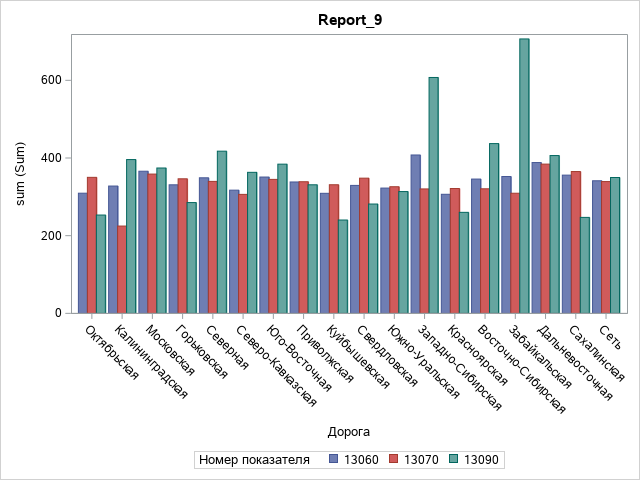

In [48]:
proc sgplot data = Report9 (encoding='wcyrillic');
    title 'Report_9';
    format dor_id $fdors. operiod $foper. var_id $fvarID.;
    vbar dor_id / response=sum group = var_id GROUPDISPLAY = CLUSTER;
run;